# Image란?


## Image는 $width \times height \times channel$ 의 pixel 들로 이루어진 배열(array)

-   **Pixel(화소)**: image 값을 표현 영역의 최소단위. 하나의 영상에 width X height 개수만큼 존재한다.화소는 그 영역의 색 농도의 단계를 표현하는 값을 가진다. 한개 pixcel이 몇 비트를 사용하는지에 따라 색 농도의 세밀함이 달라진다. (8 bit: 256단계, 10 bit: 1024단계)
-   **Width**: 너비로 이미지의 가로 길이를 의미한다.
-   **Height**: 높이로 이미지의 세로 길이를 의미한다.
-   **Channel**
    -   한 pixcel에서 색을 표현하기 위해 사용하는 값의 개수.
    -   color는 3개(Red, Green, Blue), Grayscale은 1개(회색조) 값으로 표현한다.

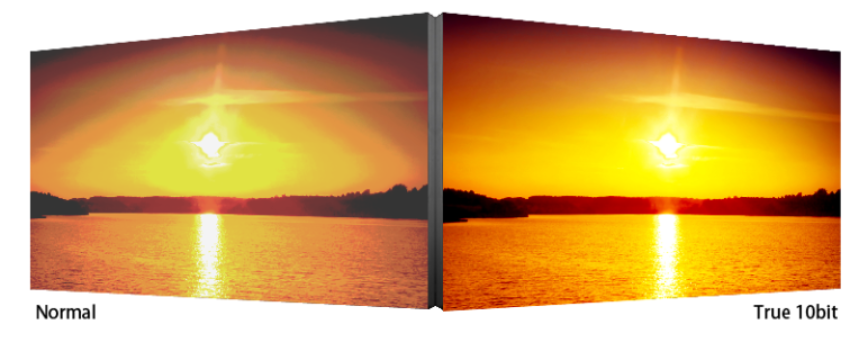


# Open CV 개요

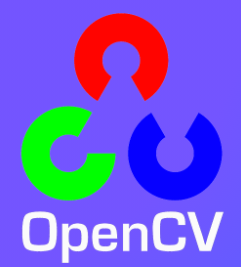

-   https://opencv.org/
-   Open Source Computer Vision Library로 실시간 computer vision을 목적으로 개발됨.
-   Intel에서 개발하다가 open source화 됨.
-   Cross Platform으로 Windows, Mac, Linux, OS에 상관없이 동작 가능
-   C/C++로 개발 되었으나 Python, JAVA, MATLAB의 개발 환경도 지원한다.
-   실시간에 초점을 맞추고 나온 library이기 때문에 mobile device나 로봇 등에 recognition module로 붙여 영상처리에 활용된다.


# OpenCV 설치

-   `!pip install opencv-contrib-python`


In [2]:
import cv2
import numpy as np
import pandas as pd
cv2.__version__, # np.__version__, pd.__version__

('4.9.0',)

# 이미지 읽기

-   **`imread(filename [, flag]) : ndarray`**
    -   이미지를 읽는다.
    -   filename: 읽어들일 이미지 파일경로
    -   flag: 읽기 모드
        -   cv2.IMREAD_XXXXX 상수를 이용한다.
        -   IMREAD_COLOR가 기본(BGR 모드)
            -   matplotlib에서 출력시 rgb 모드로 변환해야 한다.
    -   읽은 이미지를 ndarray(numpy 배열) 로 반환한다.


In [3]:
import cv2
import numpy as np

img = cv2.imread("images/dog.jpg")

In [4]:
print(type(img))
print(img.shape, "(height, width, channel)")
print(img.dtype, "unsigned integer 8bit")
print(img.min(), img.max())

<class 'numpy.ndarray'>
(359, 640, 3) (height, width, channel)
uint8 unsigned integer 8bit
0 255


In [5]:
print(img[0, 0]) # [Blue, Green, Red]  # BGR 모드

[28 46 63]


### matplotlib 으로 출력

-   `plt.imshow(ndarray)`
    -   grayscale: `plt.imshow(ndarray, cmap='grays')`
-   jupyter notebook 내에 출력이 가능


In [5]:
np.array([28, 46, 63])[::-1]

array([63, 46, 28])

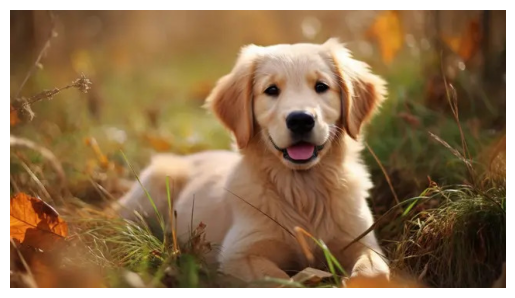

In [7]:
import matplotlib.pyplot as plt
# opencv - channel을 BGR 표현 [28: blue농도, 46: green농도, 63: red농도]
# matplotlib - channel을 RGB 표현. [28:red농도 46:green농도 63: blue농도]
# plt.imshow(img)   
plt.imshow(img[:, :, ::-1])
plt.axis("off")  # spine들을 제거
plt.show()

## cv2에서 이미지 출력

-   **`cv2.imshow(winname, mat)`**
    -   창을 띄워 이미지를 출력한다.
    -   winname: 창 이름
        -   창이름이 같으면 같은 창에 띄운다.
    -   mat: 출력할 이미지(ndarray)
        -   dtype이 uint8이어야 정상 출력된다. (float일 경우 255를 곱해서 출력한다.)
-   **`cv2.imwrite(filename, img): bool`**
    -   이미지 파일로 저장
    -   filename: 저장할 파일경로
    -   img: 저장할 이미지(ndarray)


> cv2.waitKey(밀리초): int
>
> -   지정한 밀리초(1/1000 초)동안 keyboard 입력을 기다린다.
> -   입력된 key 코드를 반환하며 지정된 시간동안 keyboard입력을 못받은 경우 -1을 반환한다.
> -   argument로 0을 입력하면 keyboard 입력을 받을 때 까지 무한 대기한다.
> -   https://www.ascii-code.com/


In [8]:
cv2.imshow("frame", img)
i = cv2.waitKey()
print(i)
cv2.destroyAllWindows()

32


In [9]:
# esc 입력시 종료
cv2.imshow("frame", img)
while True:
    if cv2.waitKey() == 27:  # ord('q') : q 입력시 종료
        break
cv2.destroyAllWindows()

In [12]:
ord('a')  # ord(문자) 그 문자의 ascii  코드값을 10진수로 알려줌.

97

In [12]:
### Grayscale로 읽기(출력)
import cv2
img_gray = cv2.imread("images/dog.jpg", cv2.IMREAD_GRAYSCALE)

In [13]:
print(img_gray.shape, "(height, width) - channel 축이 없다.")

(359, 640) (height, width) - channel 축이 없다.


In [15]:
try:
    cv2.imshow("frame", img_gray)
    cv2.waitKey()
    cv2.imshow("frame1", img)
    cv2.waitKey()
except:
    pass
cv2.destroyAllWindows()

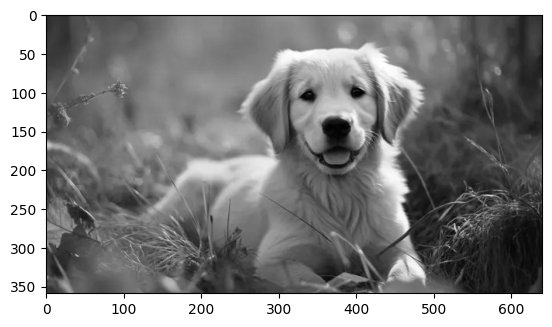

In [17]:
# Grayscale을 matplotlib 으로 출력 => cmap="gray"
plt.imshow(img_gray, cmap="gray")
plt.show()

In [14]:
### 파일저장
cv2.imwrite("images/dog_gray.jpg", img_gray)

True

In [15]:
img_gray

array([[49, 49, 49, ..., 51, 51, 51],
       [49, 49, 49, ..., 51, 51, 51],
       [48, 48, 49, ..., 51, 51, 51],
       ...,
       [52, 55, 58, ..., 40, 40, 40],
       [51, 54, 58, ..., 40, 40, 40],
       [50, 54, 59, ..., 40, 40, 40]], dtype=uint8)

## 색 공간 변환

색 공간이란 어떤 값들을 조합해서 색을 표현하는지 색을 정의하는 방법이다.

### 주요 색공간

1. RGB
    - 색의 3원소인 Red, Green, Blue 조합해서 색을 정의한다.
    - OpenCV는 RGB 대신 BGR 색공간을 기본으로 사용한다.
        - 입/출력시 BGR 모드로 처리한다.
1. CMYK
    - Cyan, Magenta, Yello, Key(Black) 을 조합해서 색을 정의한다..
1. HSV
    - Hue(색), Saturation(채도, 색의 선명도), Value(명도, 밝기) 를 조합해서 색을 정의 한다.


### 색공간 변환함수

-   **`cv2.cvtColor(src, code)`**
    -   image 의 color space를 변환한다.
    -   src: 변환시킬 이미지 (ndarray)
    -   code
        -   변환시킬 색공간 타입 지정
        -   cv2.COLOR_XXX2YYY 형태의 상수 지정(XXX를YYY로 변환)
            -   cv2.COLOR_BGR2GRAY / cv2.COLOR_GRAY2BGR (BGR <-> GRAY)
            -   cv2.COLOR_BGR2RGB / cv2.COLOR_RGB2BGR (BGR <-> RGB)
            -   cv2.COLOR_BGR2HSV / cv2.COLOR_HSV2BGR (BGR <-> HSV)


> -   color를 gray로 변환하면 색정보를 손실하는 단점이 있지만 저장용량을 줄이고 처리속도를 향상시킬 수 있다.
> -   gray 로 변환 : rgb를 더하는데 opencv는 다음과 같이 가중치를 줘서 더한다.
>     $$ y = 0.299R + 0.587G + 0.114B$$


In [19]:
img = cv2.imread('images/lenna.bmp') # color 
img.shape

(512, 512, 3)

In [29]:
cv2.imshow("frame", img)
cv2.waitKey()
cv2.destroyAllWindows()

In [21]:
b = img[:, :, 0]
g = img[:, :, 1]
r = img[:, :, 2]
b.shape, g.shape, r.shape

((512, 512), (512, 512), (512, 512))

In [22]:
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)   # BGR -> HSV
img_hsv.shape

(512, 512, 3)

In [23]:
h = img_hsv[:, :, 0]  #Hue - 색을 표현
s = img_hsv[:, :, 1]   # Saturatrion - 채도
v = img_hsv[:, :, 2]  # Value - 명암

In [24]:
# 같은 위치의 pixcel값 조회
b[0, 0], h[0, 0]

(125, 4)

## 채널 확인

-   채널별로 나눠 이미지 출력


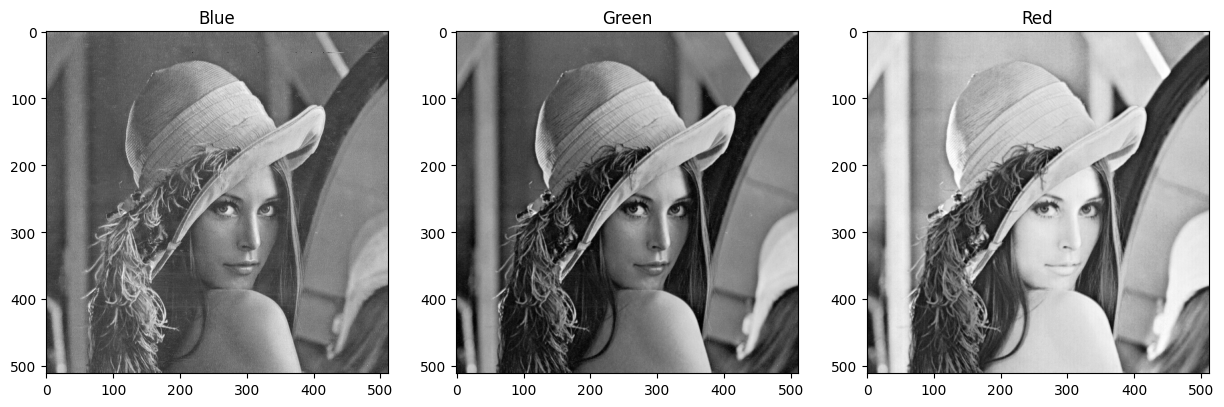

In [26]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(b, cmap='gray')
plt.title("Blue")

plt.subplot(1, 3, 2)
plt.imshow(g, cmap='gray')
plt.title('Green')

plt.subplot(1, 3, 3)
plt.imshow(r, cmap='gray')
plt.title('Red')

plt.show()

In [28]:
b[300, 300], g[300, 300], r[300, 300]

(87, 88, 213)

## 색으로 이미지 분할 하기

-   이미지 분할(세분화-image segmentation)는 이미지내에서 하나의 물체를 구성하는 pixcel들은 같은 값으로 구성하고 물체별로 다른 pixcel값들로 구성하게 하여 물체를 나누는 작업이다.
-   RGB를 HSV 모드로 변환 후 특정색만 추출하기
-   HSV는 Hue 가 색을 나타낸다. 원래는 0 ~ 360 까지의 값으로 색을 표현하는데 opencv는 uint8타입을 쓰므로 절반인 0 ~ 180을 사용한다.

![hsv hue](figures/hsv_h.jpg)<br>
<HSV - 색상><br>
![hsv_hue_opencv](figures/hsv_h_opencv.png)<br>
<OpenCV HSV - 색상>


In [2]:
import cv2
import numpy as np
mnm = cv2.imread("images/mnm.jpg")
hsv_mnm = cv2.cvtColor(mnm, cv2.COLOR_BGR2HSV)
# BGR -> HSV 변환.  색의 범위로 작업을 하기 위해 변환. H(색), BGR(색)

# 빨강색 초콜릿만 세분화.(분할)  
# 빨강색 범위: 0 ~ 10, 170 ~ 180
# 채도, 명도 범위: 100 ~255
low_red1 = np.array([0, 100, 100])  # 범위의 작은지점. (색: 0, 채도:100, 명도:100)
up_red1 = np.array([10, 255, 255])
low_red2 = np.array([170, 100, 100])
up_red2 = np.array([180, 255, 255])
### 채널별로 255를 만들 범위를 지정. 
# 빨강색이 있는 영역을 찾기. (빨강색영역의 pixcel들: 255, 나머진: 0) - Mask
mask1 = cv2.inRange(hsv_mnm, low_red1, up_red1)
mask2 = cv2.inRange(hsv_mnm, low_red2, up_red2)
mask = mask1 + mask2 

# mask  지정 -> mask 영역(255)만 계산. 나머지는 0을 반환.
# 같은 image로 bitwise_and() 연산 -> 원래 이미지가 출력으로 나옴.
red_mnm = cv2.bitwise_and(mnm, mnm, mask=mask) 
# mask의 255(red)는 mnm 이미지를 나머지 영역(0)은 0이 반환

In [3]:
mask.shape, mnm.shape, type(mask)

((417, 630), (417, 630, 3), numpy.ndarray)

In [4]:
mask[200:230, 200:230]

array([[  0, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255],
       [  0,   0, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255],
       [  0,   0,   0,   0,   0, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255],
       [  0,   0,   0,   0,   0,   0,   0,   0, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,

In [6]:
cv2.imshow("frame", mnm)
cv2.imshow("Red", red_mnm)
cv2.waitKey()
cv2.destroyAllWindows()

## 이미지 이진화를 이용한 이미지 분할

-   **이진화(Binarization)는** 영상의 모든 pixcel(화소)값들을 두개 값으로 재설정하는 이미지 분할의 가장 간단한 방법.
-   **Grayscale 이미지**에 적용한다.
-   보통 물체와 배경을 분리할 때 사용한다.
-   `cv2.threshold(src, threshold, maxval, type)`
    -   src: 대상 이미지(channel 1인 gray scale 이미지)
    -   threshold: 변경의 기준값
    -   maxval: 변경할 값
        -   변경할 값은 0, 기존값 유지, maxval 중에 하나로 변경된다.
    -   type: 변경방법
        -   cv2.THRESH_BINARY: threshold보다 크거나 같으면 maxval로 아니면 0으로 바꿈
        -   cv2.THRESH_BINARY_INV: threshold보다 크면 0이고 아니면 maxval로 바꿈
        -   cv2.THRESH_TRUNC: threshold보다 크거나 같으면 threshold 값으로 바꾸고 작으면 원래값 유지
        -   cv2.THRESH_TOZERO: threshold보다 크거나 같으면 원래값 그대로 유지하고 작으면 0으로 할당
        -   cv2.THRESH_TOZERO_INV: threshold보다 크면 0으로 바꾸고 작으면 원래값 그대로 유지.
-   `inRange(src, lowerb, upperb)` - lowerb ~ upperb 범위 안의 pixcel값은 255, 범위 밖의 pixcel값은 0으로 변환한다.


In [44]:
import numpy as np
import cv2
np.random.seed(0)
a = np.random.randint(0, 256, (5, 5), dtype='uint8')
a

array([[172,  10, 127, 140,  47],
       [170, 196, 151, 117, 166],
       [ 22, 183, 192, 204,  33],
       [216,  67, 179,  78, 154],
       [251,  82, 162, 219, 195]], dtype=uint8)

In [48]:
cv2.threshold(a,  #이진화 대상 배열(이미지)
                  200, # threshold값(임계값)
                  255, # maxvalue ->  임계값 이상인 값을 무엇으로 바꿀지
                  cv2.THRESH_BINARY # 변환방식
             )

(200.0,
 array([[  0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0],
        [  0,   0,   0, 255,   0],
        [255,   0,   0,   0,   0],
        [255,   0,   0, 255,   0]], dtype=uint8))

In [50]:
cv2.inRange(a, # 대상
                180, 200  # 100 ~ 200  사이의 값들은 255, 나머지는 0 
           )
# cv2.threshold(), cv2.inRange(): channel별로 따로 처리. channel이 3개이면 임계값, 범위를 배열로 지정.

array([[  0,   0,   0,   0,   0],
       [  0, 255,   0,   0,   0],
       [  0, 255, 255,   0,   0],
       [  0,   0,   0,   0,   0],
       [  0,   0,   0,   0, 255]], dtype=uint8)

In [8]:
lenna_color = cv2.imread("images/lenna.bmp")  # cv2.IMREAD_GRAYSCALE
lenna = cv2.cvtColor(lenna_color, cv2.COLOR_BGR2GRAY) #bgr -> gray
# lenna.shape
thresh, lenna_bin = cv2.threshold(lenna, 127, maxval=255, type=cv2.THRESH_BINARY)
thresh

127.0

In [9]:
cv2.imshow("org", lenna)
cv2.imshow("bin", lenna_bin)
cv2.waitKey()
cv2.destroyAllWindows()

In [57]:
lenna[:20, :20]#

array([[162, 162, 162, 161, 162, 157, 163, 161, 165, 161, 162, 160, 155,
        163, 160, 155, 157, 156, 161, 161],
       [162, 162, 162, 161, 162, 157, 163, 161, 165, 161, 162, 160, 155,
        163, 160, 155, 157, 156, 161, 161],
       [162, 162, 162, 161, 162, 157, 163, 161, 165, 161, 162, 160, 155,
        163, 160, 155, 157, 156, 161, 161],
       [162, 162, 162, 161, 162, 157, 163, 161, 165, 161, 162, 160, 155,
        163, 160, 155, 157, 156, 161, 161],
       [162, 162, 162, 161, 162, 157, 163, 161, 165, 161, 162, 160, 155,
        163, 160, 155, 157, 156, 161, 161],
       [164, 164, 158, 155, 161, 159, 159, 160, 160, 160, 155, 159, 154,
        154, 156, 154, 156, 156, 153, 157],
       [160, 160, 163, 158, 160, 162, 159, 156, 159, 162, 156, 162, 155,
        155, 156, 152, 153, 160, 154, 154],
       [159, 159, 155, 157, 158, 159, 156, 157, 159, 161, 161, 158, 153,
        153, 153, 151, 155, 154, 156, 153],
       [155, 155, 158, 158, 159, 160, 157, 157, 163, 157, 158, 1

# 동영상 처리

## 동영상 읽기

-   VideoCapture 클래스사용
    -   객체 생성
        -   VideoCapture('동영상파일 경로'): 동영상파일
        -   VideoCapture(웹캠 ID): 웹캠
-   VideoCapture의 주요 메소드
    -   isOpened(): bool
        -   입력 대상과 연결되었는지 여부반환
    -   read(): (bool, img)
        -   Frame 이미지로 읽기
        -   반환값
            -   bool: 읽었는지 여부
            -   img: 읽은 이미지(ndarray)
    -   release()
        -   카메라/동영상과 연결 종료


### 웹캠으로 부터 실시간 입력 받기


> -   **주의**
> -   맥에서 웹캠연결
>     -   mac 시스템 환경 설정에 보안 및 개인 정보 보호에서 카메라 관련 권한 설정필요.
>     -   [출처](https://hoony-gunputer.tistory.com/entry/opencv-python-비디오-읽고-쓰기)


In [69]:
import cv2

# 카메라와 연결 -> 카메라 id  (정수)
cap = cv2.VideoCapture(0)
# 연결 성공 여부를 확인
print(cap.isOpened())
while cap.isOpened():  # 카메라와 연결되 있는 동안 
    # 한 Frame을 읽기
    succ, frame = cap.read()  # return: tuple  (성공여부, 읽은 frame)
    if not succ: # 읽기 실패
        print("캡쳐 실패")
        break

    # 좌우 반전
    frame = cv2.flip(frame, 1)  # 양수: 좌우반전, 0: 상하반전, 음수: 좌우,상하 반전
    # 흑백(grayscale)
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    cv2.imshow("frame", frame)
    if cv2.waitKey(1) == 27: # 키 입력을 1밀리초대기(1/1000초) . esc 입력시 종료
        break    

cap.release()  # 연결 닫기.
cv2.destroyAllWindows()

True


# TODO: 웹캠에서 입력된 이미지를 화면에 보여주면서 파일로 저장

-   30장당 한장씩 저장한다.
-   파일형식: output*capture/cap*번호.jpg


In [85]:
import cv2
import os
# 저장할 디렉토리 생성
os.makedirs('output_capture', exist_ok=True)

cap = cv2.VideoCapture(0)
FPS = cap.get(cv2.CAP_PROP_FPS)
print("카메라 FPS:", FPS)
cnt = 0 # 몇번째 frame인지 저장할 변수.
while cap.isOpened():    
    succ, frame = cap.read()
    if not succ:
        print("캡쳐 실패")
        break
   
    cv2.imshow("frame", frame)
    if cnt % 30 == 0:
        # 파일로 저장
        cv2.imwrite(f"output_capture/cap_{cnt+1}.jpg", frame)
        
    if cv2.waitKey(1) == 27:
        break    
    cnt += 1
    
cap.release() 
cv2.destroyAllWindows()

카메라 FPS: 30.0


### 동영상 재생


In [ ]:
# FPS (Frame Per Second) - 1초에 몇 frame 을 출력하는지 설정.

In [83]:
import cv2

cap = cv2.VideoCapture("images/wave.mp4")  # 문자열: 동영상파일 경로
# 동영상의 FPS 값을 조회
FPS = cap.get(cv2.CAP_PROP_FPS)
delay = int(1000/FPS)   # 1000밀리초(1초)/FPS -> FPS기준 1 Frame을 출력하는데 걸리는 시간.
print(FPS, delay)  # delay에 한장 씩 출력하면 FPS 가 나옴.

# # print(cap.isOpened())
while cap.isOpened():
    succ, frame = cap.read() # 한 frame 읽기.
    if not succ:
        print("캡쳐 실패")
        break

    cv2.imshow("frame", frame)
    if cv2.waitKey(delay) == 27:
        break

cap.release()
cv2.destroyAllWindows()

29.97002997002997 33


### 동영상 저장

-   capture(read)한 이미지 프레임을 연속적으로 저장하면 동영상 저장이 된다.
-   VideoWriter 객체를 이용해 저장
    -   **`VideoWriter(filename, codec, fps, size)`**
        -   filename: 저장경로
        -   codec
            -   VideoWriter_fourcc 이용
                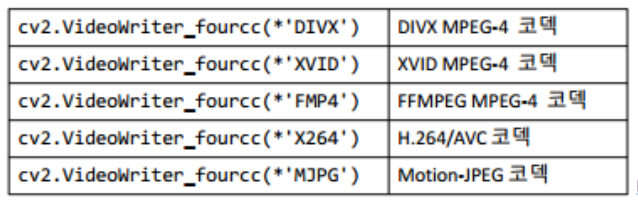
        -   fps
            -   FPS (Frame Per Second) - 초당 몇 프레임인지 지정
        -   size
            -   저장할 frame 크기로 원본 동영상이나 웹캠의 width, height 순서로 넣는다.
    -   `VideoWriter().write(img)`
        -   Frame 저장


In [90]:
## 카메라로 읽은 것을 파일로 저장
import cv2

cap = cv2.VideoCapture(0)
# 한 frame을 읽어서 size를 확인 => 저장시 사용.
succ, frame = cap.read()
print(type(frame), frame.shape) # (height, width, channel)
h, w = frame.shape[:2]

# FPS
FPS = cap.get(cv2.CAP_PROP_FPS)

# CODEC
codec = cv2.VideoWriter_fourcc("M", "J", "P", "G") # 가변인자:  *"MJPG"
#VideoWriter 생성
writer = cv2.VideoWriter("images/web_cam.avi", codec, FPS, (w, h))

while cap.isOpened():
    succ,  frame = cap.read() 
    if not succ:
        print("읽기 실패")
        break

    # 화면출력 + 저장
    frame = cv2.flip(frame, 1) # 좌우반전
    writer.write(frame)
    cv2.imshow("frame", frame)
    if cv2.waitKey(1) == 27:
        break

cap.release()
writer.release()
cv2.destroyAllWindows()

<class 'numpy.ndarray'> (480, 640, 3)


In [88]:
h, w = frame.shape[:2]
h, w

(480, 640)